In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interpreter = tf.lite.Interpreter('models/FinalModel.tflite')

In [3]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, 3)
  img = tf.cast(img, tf.float32)
  img = img/255
  return img

In [4]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [5]:
img = load_img("DATA/training/input/2609.jpg")
img = np.expand_dims(img, axis=0)
np.shape(img)

Metal device set to: Apple M1


(1, 256, 256, 3)

In [7]:
input_data = img

In [9]:
interpreter.set_tensor(input_details[0]['index'], input_data)

In [12]:
interpreter.invoke()

In [13]:
output_data = interpreter.get_tensor(output_details[0]['index'])

In [15]:
np.shape(output_data)

(1, 256, 256, 4)

In [17]:
from PIL import Image

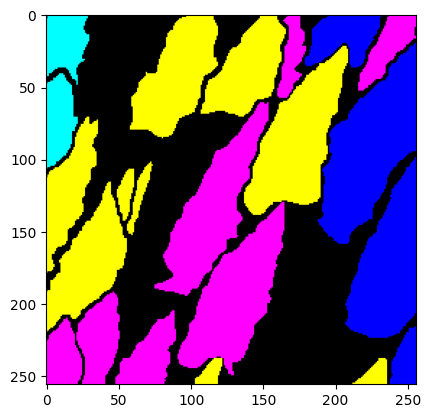

In [19]:
masked_img = Image.open("DATA/training/output/2609.png")
plt.imshow(masked_img)

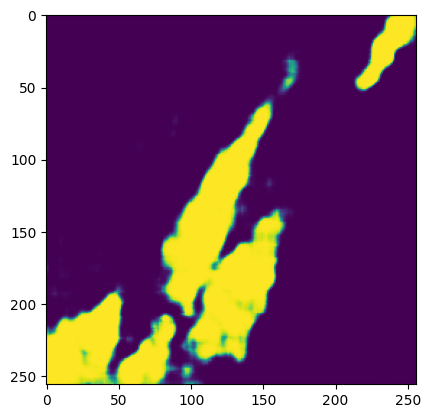

In [23]:
plt.imshow(output_data[0][:,:,3])